# Intro

Project Options:

1 person project (Simple dataset exercise)

1. Select a dataset (based on approval) or from a list provided by the professor. (Not WheatSeeds)

2. Create a “compare and contrast” at least three different ML models

3. Where appropriate compare hyperparameters for each model

4. Perform one advanced technique like LDA or PCA

5. Produce a final report that includes an analysis of the ML model performance.  You must include ROC diagrams, Confusion Charts, and other relevant performance metrics.  You must include your software models in a GitHub repo.

Code Book:

Source: Mushroom Data Set  https://archive.ics.uci.edu/ml/datasets/Mushroom

Models (right now): log regression, KNN, Decision Tree 

Goal: Predict if a mushroom is edible or poisonous

Data Set Characteristics: Multivariate

Number of Instances: 8124

Attribute Characteristics: Categorical

Number of Attributes: 22

Associated Tasks: Classification

Missing Values? Yes

Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


# Summary Stats

In [65]:

#load lbaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [66]:
#load data
#Source: Mushroom Data Set  https://archive.ics.uci.edu/ml/datasets/Mushroom

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

data = pd.read_csv(url, header=None, names=columns)

#test/quick back up data
dataX = pd.read_csv(url, header=None, names=columns)


#check import of data
#as noted on Attribute Information, data poitnts are in a non numerical format 
data


,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [67]:
#source says there are NAs, even though they are not showing up
# further manual inspection shows that NA values are in '?' format, 

#checking summary statistics 
data.isnull().sum()

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [68]:
#remove all rows with '?' 
data = data[data['stalk_root'] != "?"]

#recount NA values
print(data.isna().sum())

#percent of missing values form the data 
#0.3052683407188577
2480/8124

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64


0.3052683407188577

In [69]:
#check 
#rows are now 5644, rather then the previous 8124
data.info()
data.shape
data.describe()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5644 entries, 0 to 8114
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     5644 non-null   object
 1   cap_shape                 5644 non-null   object
 2   cap_surface               5644 non-null   object
 3   cap_color                 5644 non-null   object
 4   bruises                   5644 non-null   object
 5   odor                      5644 non-null   object
 6   gill_attachment           5644 non-null   object
 7   gill_spacing              5644 non-null   object
 8   gill_size                 5644 non-null   object
 9   gill_color                5644 non-null   object
 10  stalk_shape               5644 non-null   object
 11  stalk_root                5644 non-null   object
 12  stalk_surface_above_ring  5644 non-null   object
 13  stalk_surface_below_ring  5644 non-null   object
 14  stalk_color_above_ring  

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,e,b,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8001,e,x,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8038,e,x,y,g,t,n,f,c,b,w,...,s,w,w,p,w,t,p,w,y,p
8095,p,x,y,c,f,m,f,c,b,y,...,y,c,c,p,w,n,n,w,c,d


In [70]:
data.dtypes

class                       object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

In [71]:
#unique values 
for column in data.columns:
    unique_values = data[column].unique()
    print(f'Unique values in column {column}: {unique_values}')

#target varable is 'class' 
#0 = p = poisonous
#1 = e = eatable 

Unique values in column class: ['p' 'e']
Unique values in column cap_shape: ['x' 'b' 's' 'f' 'k' 'c']
Unique values in column cap_surface: ['s' 'y' 'f' 'g']
Unique values in column cap_color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'c']
Unique values in column bruises: ['t' 'f']
Unique values in column odor: ['p' 'a' 'l' 'n' 'f' 'c' 'm']
Unique values in column gill_attachment: ['f' 'a']
Unique values in column gill_spacing: ['c' 'w']
Unique values in column gill_size: ['n' 'b']
Unique values in column gill_color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'r' 'y']
Unique values in column stalk_shape: ['e' 't']
Unique values in column stalk_root: ['e' 'c' 'b' 'r']
Unique values in column stalk_surface_above_ring: ['s' 'f' 'k' 'y']
Unique values in column stalk_surface_below_ring: ['s' 'f' 'y' 'k']
Unique values in column stalk_color_above_ring: ['w' 'g' 'p' 'n' 'b' 'c' 'y']
Unique values in column stalk_color_below_ring: ['w' 'p' 'g' 'b' 'n' 'c' 'y']
Unique values in column veil_type: ['p']
Unique values in co

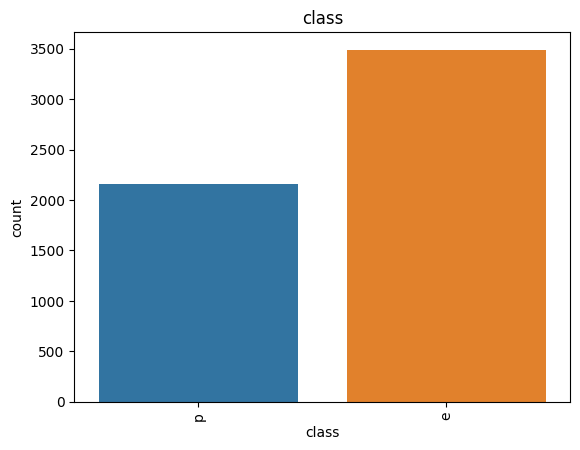

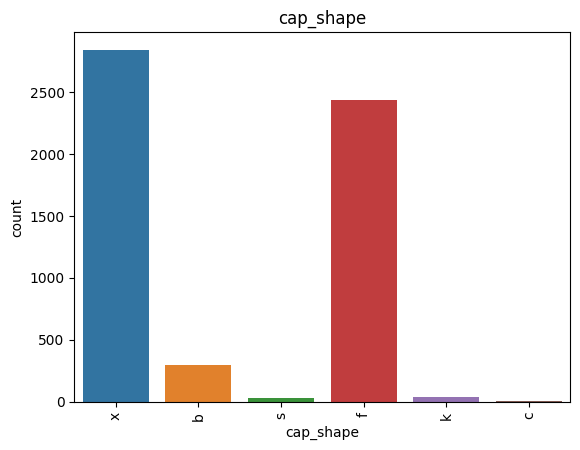

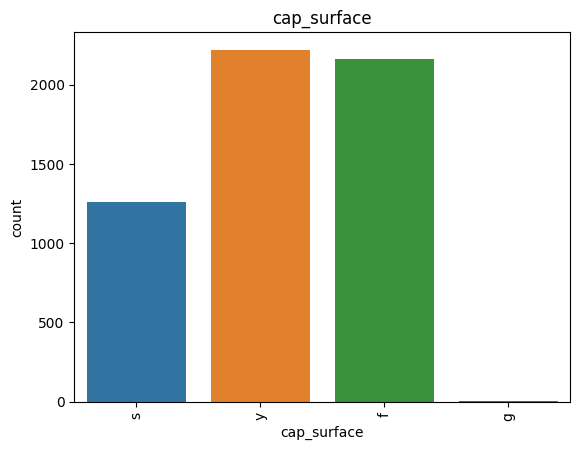

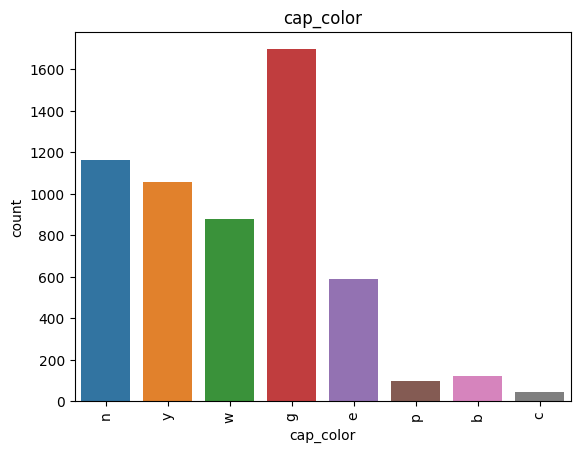

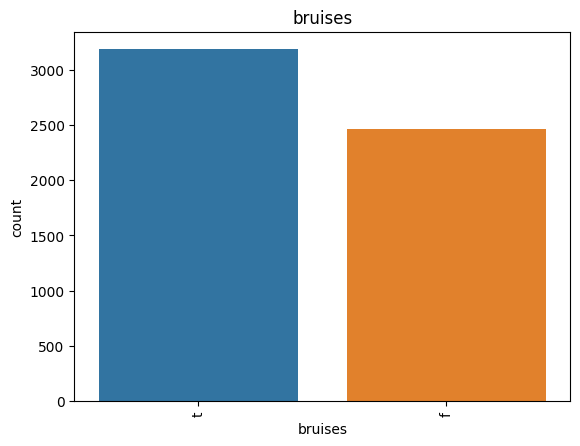

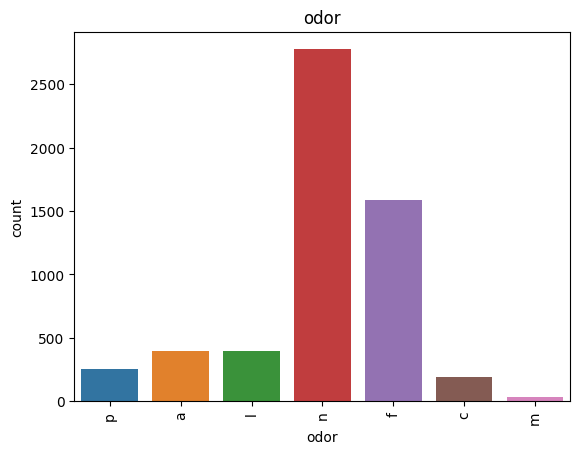

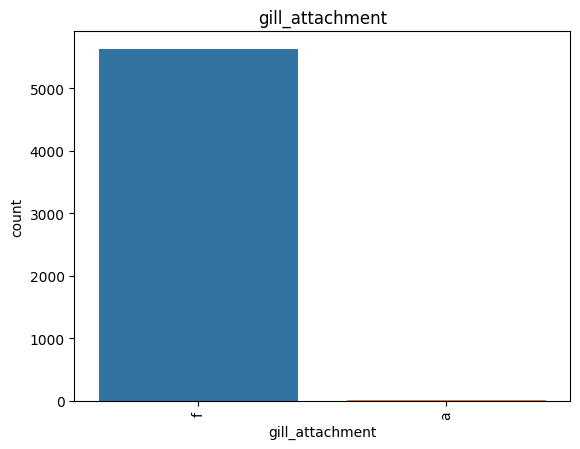

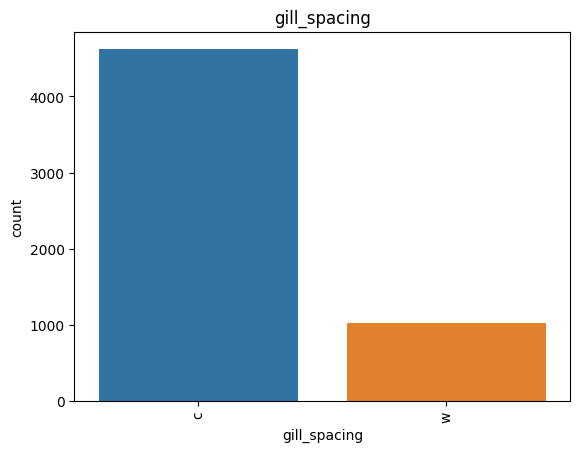

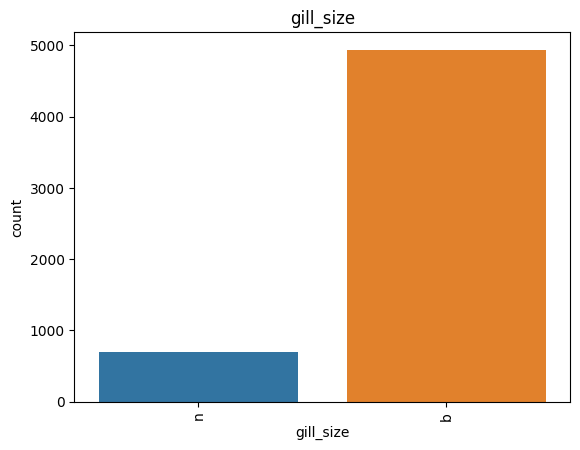

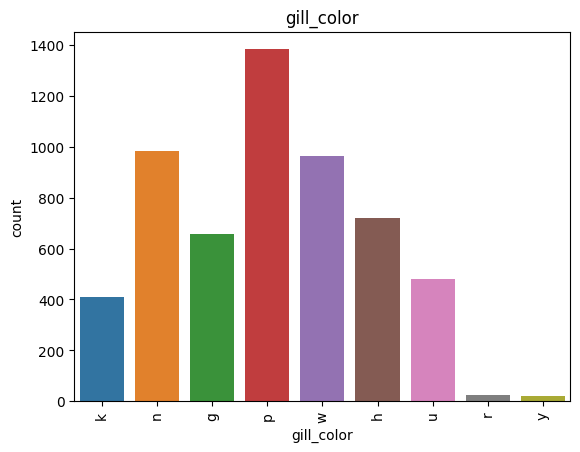

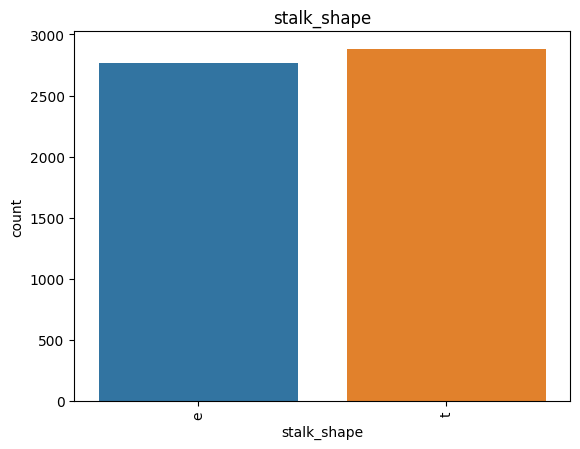

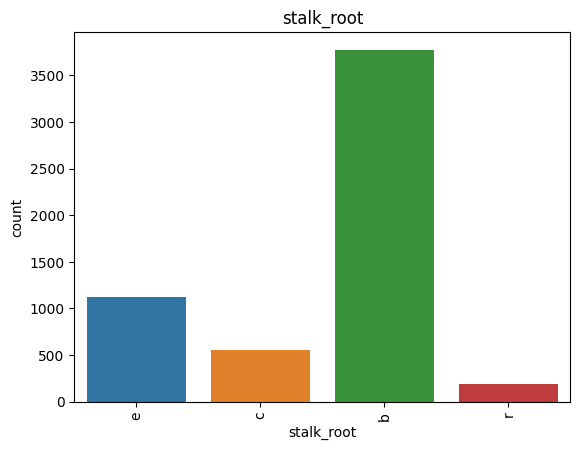

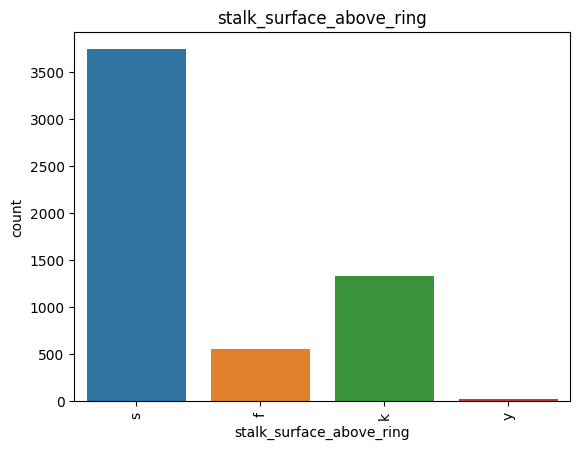

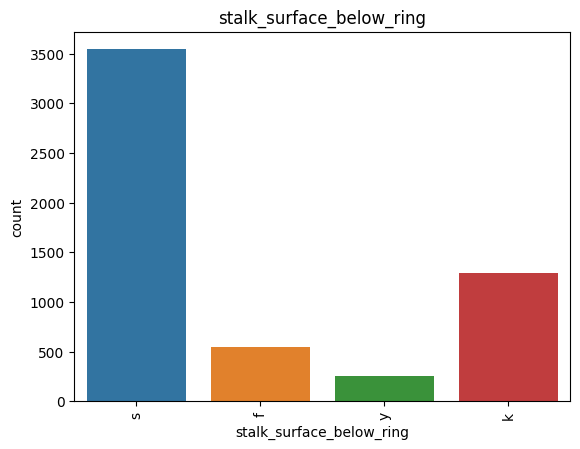

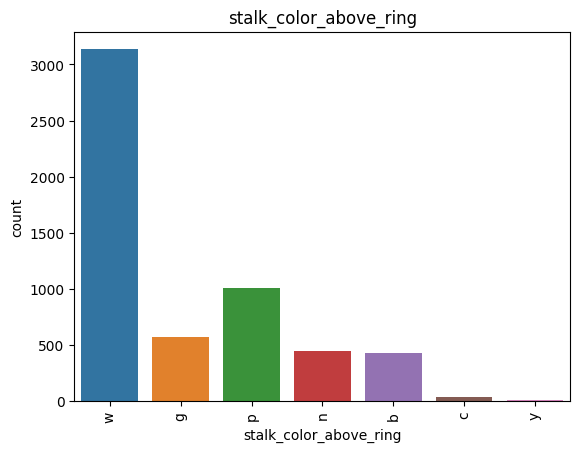

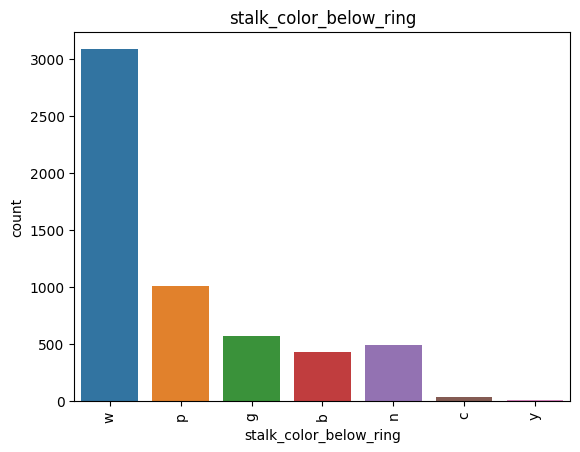

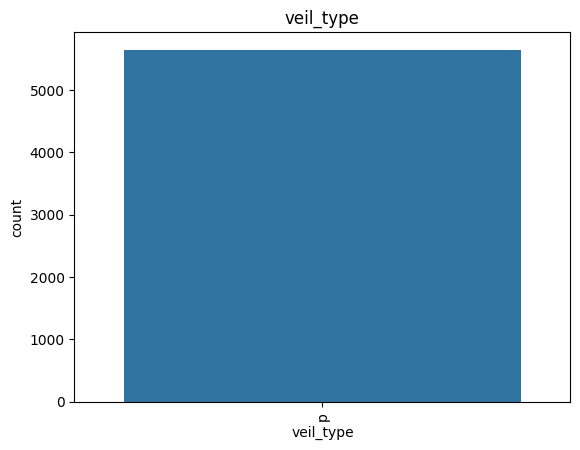

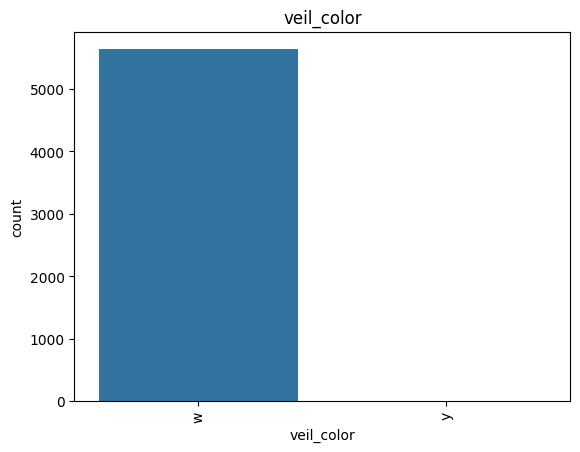

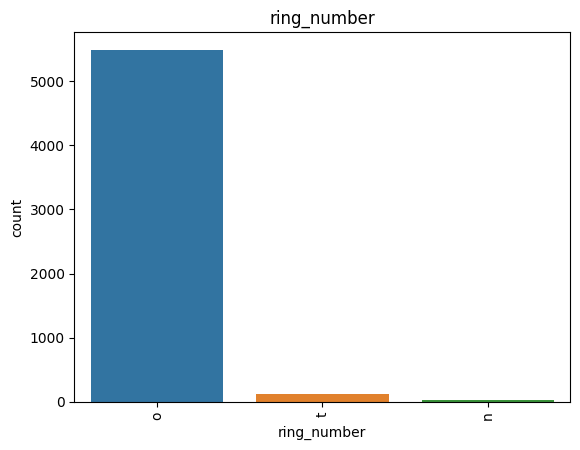

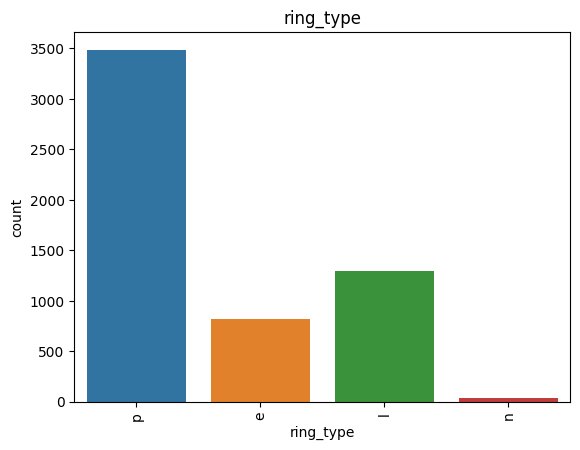

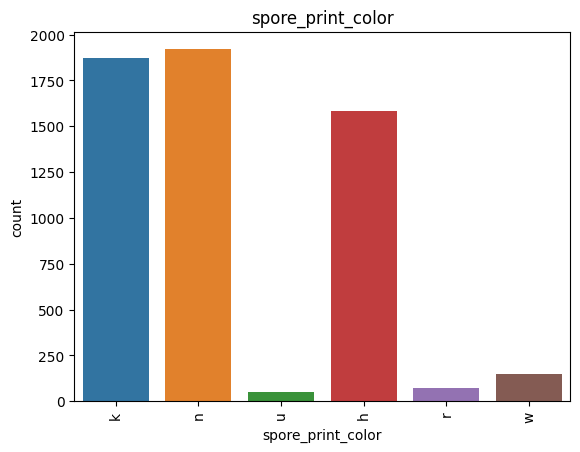

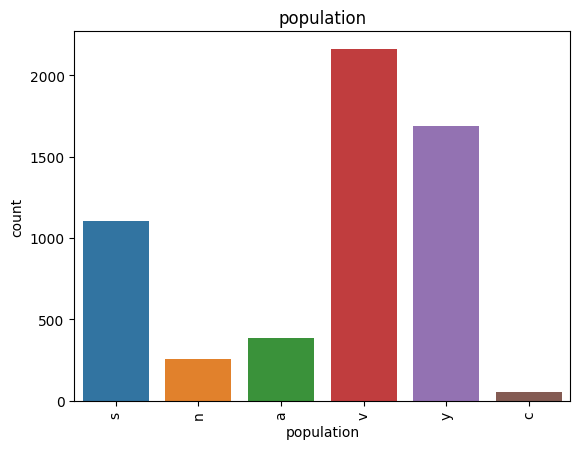

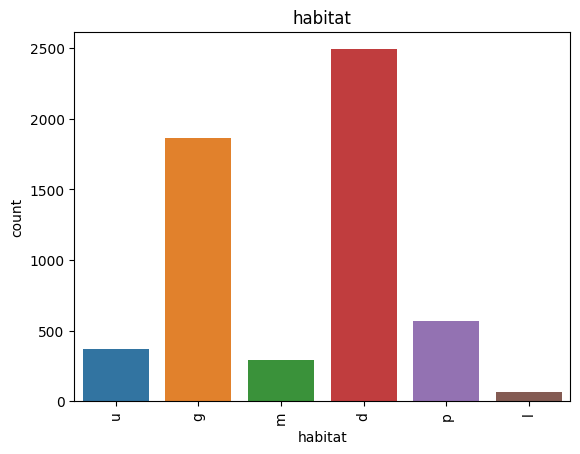

In [72]:
#bar plots for each categorical varabel ALL OF THEM

for column in dataX.select_dtypes(include='object'):
    plt.figure()
    sns.countplot(x=data[column])
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()


# Exploratory Data Analysis (EDA)
*   Summarize statistics of the dataset

*   Discuss the visualizations used to explore the data, and any patterns or trends observedEDA

In [73]:
## target varable

#instance of LabelEncoder
label_encoder = LabelEncoder()

#encode the 'class' column b/c it is the target varable and can only use 'label_encoder'
data['class'] = label_encoder.fit_transform(data['class'])

#then drop 'class' column b/c don't want to encode the target variable with the 'onehotencoder' method
data_features = data.drop('class', axis=1)


##  other features 

#instance of OneHotEncoder
onehot_encoder = OneHotEncoder()

#fit and transform 
data_encoded = onehot_encoder.fit_transform(data_features)

# Convert the encoded sparse matrix to a dense DataFrame
data_onehot = pd.DataFrame(data_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(data_features.columns))


# add back the target varabel 
data_onehot['class'] = data['class'].values


# rename the df to match again with the updated classes 
data = data_onehot

# check 
print(data)



      cap_shape_b  cap_shape_c  cap_shape_f  cap_shape_k  cap_shape_s  \
0             0.0          0.0          0.0          0.0          0.0   
1             0.0          0.0          0.0          0.0          0.0   
2             1.0          0.0          0.0          0.0          0.0   
3             0.0          0.0          0.0          0.0          0.0   
4             0.0          0.0          0.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
5639          1.0          0.0          0.0          0.0          0.0   
5640          0.0          0.0          0.0          0.0          0.0   
5641          0.0          0.0          0.0          0.0          0.0   
5642          0.0          0.0          0.0          0.0          0.0   
5643          0.0          0.0          1.0          0.0          0.0   

      cap_shape_x  cap_surface_f  cap_surface_g  cap_surface_s  cap_surface_y  \
0             1.0            0.0          

<ipython-input-73-ddd675bc4c77>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = label_encoder.fit_transform(data['class'])


In [74]:
#find correlation matrix
correlation_matrix = data.corr()

# correlation coefficients with the target variable 'class'
correlations_with_target = correlation_matrix['class'].drop('class', axis=0)

#absolute values
abs_correlations_with_target = correlations_with_target.abs()

#sort
sorted_correlations = abs_correlations_with_target.sort_values(ascending=False)

# check
print(sorted_correlations)


spore_print_color_h           0.794472
odor_f                        0.794472
odor_n                        0.709304
stalk_surface_above_ring_k    0.706930
ring_type_l                   0.694419
                                ...   
cap_shape_k                   0.010297
cap_surface_y                 0.008931
stalk_surface_above_ring_y    0.006545
population_y                  0.002538
veil_type_p                        NaN
Name: class, Length: 98, dtype: float64


In [75]:
#threshold for determining if a correlation is significant
correlation_threshold = 0.5

# lopp to pull out the best ones 
for feature, correlation in correlations_with_target.items():
    if abs(correlation) >= correlation_threshold:
        print(f"{feature} is correlated with the target variable with a correlation coefficient of {correlation:.2f}")

odor_f is correlated with the target variable with a correlation coefficient of 0.79
odor_n is correlated with the target variable with a correlation coefficient of -0.71
stalk_shape_e is correlated with the target variable with a correlation coefficient of 0.59
stalk_shape_t is correlated with the target variable with a correlation coefficient of -0.59
stalk_surface_above_ring_k is correlated with the target variable with a correlation coefficient of 0.71
stalk_surface_above_ring_s is correlated with the target variable with a correlation coefficient of -0.58
stalk_surface_below_ring_k is correlated with the target variable with a correlation coefficient of 0.69
stalk_surface_below_ring_s is correlated with the target variable with a correlation coefficient of -0.51
ring_type_l is correlated with the target variable with a correlation coefficient of 0.69
spore_print_color_h is correlated with the target variable with a correlation coefficient of 0.79


In [76]:
# clean it up so it can be read easier 

unique_feature_names = set()

for feature, correlation in correlations_with_target.items():
    if abs(correlation) >= correlation_threshold:
        feature_parts = feature.split("_")[:-1]   #remove '_'
        last_digit_index = None     
        for index, part in enumerate(feature_parts):
            if part[-1].isdigit():
                last_digit_index = index
                break     
        feature_name_cleaned = "_".join(feature_parts[:last_digit_index])
        unique_feature_names.add(feature_name_cleaned)

# show feature names
print(sorted(unique_feature_names))



['odor', 'ring_type', 'spore_print_color', 'stalk_shape', 'stalk_surface_above_ring', 'stalk_surface_below_ring']


In [77]:
# Set the correlation threshold
correlation_threshold = 0.5

#features with correlation values above .5
selected_features = sorted_correlations[sorted_correlations > correlation_threshold].index

# new df w/ selected features and 'class'
selected_data = data[selected_features].copy()
selected_data['class'] = data['class']

# Check the new DataFrame
print(selected_data)


      spore_print_color_h  odor_f  odor_n  stalk_surface_above_ring_k  \
0                     0.0     0.0     0.0                         0.0   
1                     0.0     0.0     0.0                         0.0   
2                     0.0     0.0     0.0                         0.0   
3                     0.0     0.0     0.0                         0.0   
4                     0.0     0.0     1.0                         0.0   
...                   ...     ...     ...                         ...   
5639                  0.0     0.0     1.0                         0.0   
5640                  0.0     0.0     1.0                         0.0   
5641                  0.0     0.0     1.0                         0.0   
5642                  0.0     0.0     0.0                         1.0   
5643                  0.0     0.0     0.0                         1.0   

      ring_type_l  stalk_surface_below_ring_k  stalk_shape_e  stalk_shape_t  \
0             0.0                         0.

In [78]:
from sklearn.model_selection import train_test_split

#define features (X) and target (y)
X = data[selected_features]
y = data['class']

#train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#check 
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4515, 10)
X_test shape: (1129, 10)
y_train shape: (4515,)
y_test shape: (1129,)


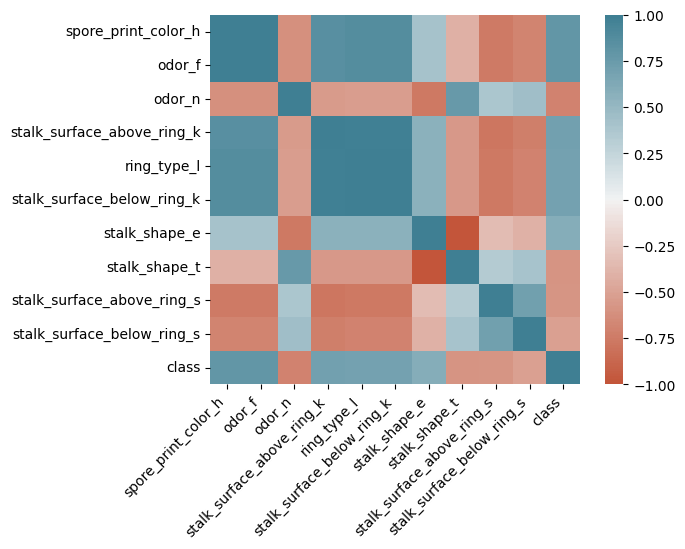

In [79]:
#HEAT MAP

#i feel i could have done this differently, b/c it doenst look the best, but I am still learning about heat maps
corr = selected_data.corr()
corr = selected_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [80]:
# Using 'dataX' to do some visual exporation 
# here I relabed the data points so that they are easier to read for the graphs below 

dataX['class']=dataX['class'].replace({'p':'Poisonous','e':'Edible'})
dataX['cap_shape']=dataX['cap_shape'].replace({'b':'Bell','c':'Conical','x':'Convex','f':'Flat',
                                                               'k':'Knobbed','s':'Sunken'})
dataX['cap_surface']=dataX['cap_surface'].replace({'f':'Fibrous','g':'Grooves','y':'scaly','s':'Smooth'})
dataX['cap_color']=dataX['cap_color'].replace({'n':'Brown','b':'Buff',
                                                               'c':'Cinnamon','g':'Gray','r':'Green','p':'Pink',
                                                               'u':'Purple','e':'Red','w':'White','y':'Yellow'})
dataX['bruises']=dataX['bruises'].replace({'t':'Brusies','f':'No'})
dataX['odor']=dataX['odor'].replace({'a':'Almond','l':'Anise','c':'Creosote','y':'Fishy','f':'Foul',
                                                     'm':'Musty','n':'None','p':'Pungent','s':'Spicy'})
dataX['gill_attachment']=dataX['gill_attachment'].replace({'a':'Attached','d':'Decending','f':'Free',
                                                                           'n':'Notched'})
dataX['gill_spacing']=dataX['gill_spacing'].replace({'c':'Close','w':'Crowded','d':'Distant'})
dataX['gill_size']=dataX['gill_size'].replace({'b':'Broad','n':'Narrow'})
dataX['gill_color']=dataX['gill_color'].replace({'k':'Black','n':'Brown','b':'Buff','h':'Chocolate',
                                                                 'g':'Gray'})
dataX['stalk_shape']=dataX['stalk_shape'].replace({'e':'Enlarging','t':'Tapering'})
dataX['stalk_root']=dataX['stalk_root'].replace({'b':'Bulbous','c':'Club','u':'Cup','e':'Equal',
                                                                 'z':'Rhizomorphs','r':'Rooted','?':'Missing'})
dataX['stalk_surface_above_ring']=dataX['stalk_surface_above_ring'].replace({'f':'Fibrous','y':'Scaly',
                                                                                         'k':'Silky','s':'Smooth'})
dataX['stalk_surface_below_ring']=dataX['stalk_surface_below_ring'].replace({'f':'Fibrous','y':'Scaly',
                                                                                         'k':'Silky','s':'Smooth'})
dataX['stalk_color_above_ring']=dataX['stalk_color_above_ring'].replace({'n':'Brown','b':'Buff',
                                                                                         'c':'Cinnamon','g':'Gray',
                                                                                         'o':'Orange','p':'Pink',
                                                                                         'e':'Red','w':'White',
                                                                                         'y':'Yellow'})
dataX['stalk_color_below_ring']=dataX['stalk_color_below_ring'].replace({'n':'Brown','b':'Buff',
                                                                                         'c':'Cinnamon','g':'Gray',
                                                                                         'o':'Orange','p':'Pink','e':'Red',
                                                                                         'w':'White','y':'Yellow'})
dataX['veil_type']=dataX['veil_type'].replace({'p':'Partial','u':'Universal'})
dataX['veil_color']=dataX['veil_color'].replace({'n':'Brown','o':'Orange','w':'White','y':'Yellow'})
dataX['ring_number']=dataX['ring_number'].replace({'n':'None','o':'One','t':'Two'})
dataX['ring_type']=dataX['ring_type'].replace({'c':'Cowbebby','e':'Evanescent','f':'Flaring','l':'Large',
                                                               'n':'None','p':'Pendant','s':'Sheating','z':'Zone'})
dataX['spore_print_color']=dataX['spore_print_color'].replace({'k':'Black','n':'Brown','b':'Buff',
                                                                               'h':'Chocolate','r':'Green','o':'Orange',
                                                                               'u':'Purple','w':'White','y':'Yellow'})
dataX['population']=dataX['population'].replace({'a':'Abundant','c':'Clustered','n':'Numerous',
                                                                 's':'Scattered','v':'Several','y':'Solitary'})
dataX['habitat']=dataX['habitat'].replace({'g':'Grasses','l':'Leaves','m':'Meadows','p':'Paths','u':'Urban',
                                                           'w':'Waste','d':'Woods'})

In [81]:

# Define the color palette
colors = ['#8B0000', '#8FBC8F']


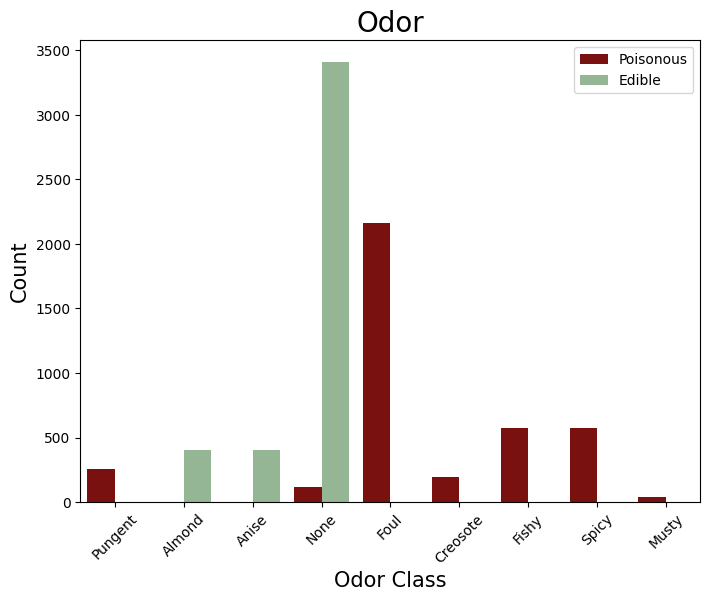

In [82]:

# ODOR histogram
plt.figure(figsize=(8,6))
sns.countplot(x='odor', data=dataX, hue='class', palette=colors)
plt.title('Odor', fontsize=20)
plt.xlabel('Odor Class', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


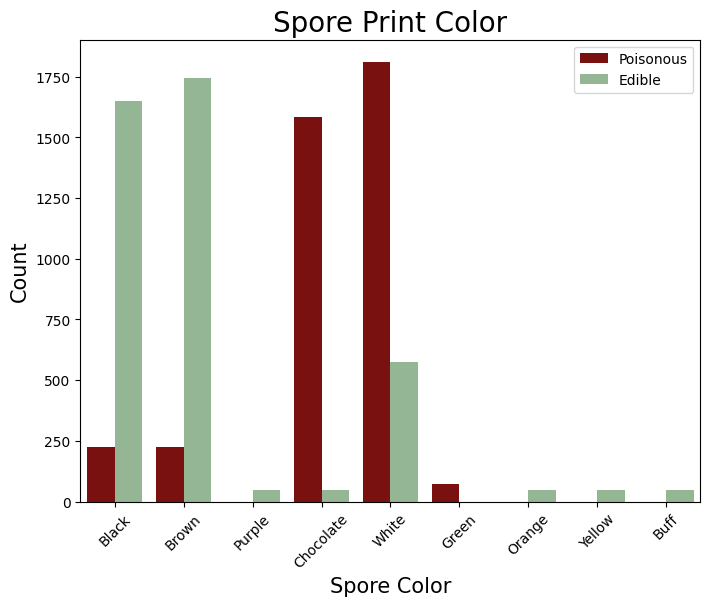

In [83]:
# Visually see the how poisonous mushrooms have chocolate and white colors VS
# how edible mushrooms are mainly black and brown 

# SPORE COLOR histogram 

plt.figure(figsize=(8,6))
sns.countplot(x='spore_print_color', data=dataX, hue='class', palette=colors)
plt.title('Spore Print Color', fontsize=20)
plt.xlabel('Spore Color', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()



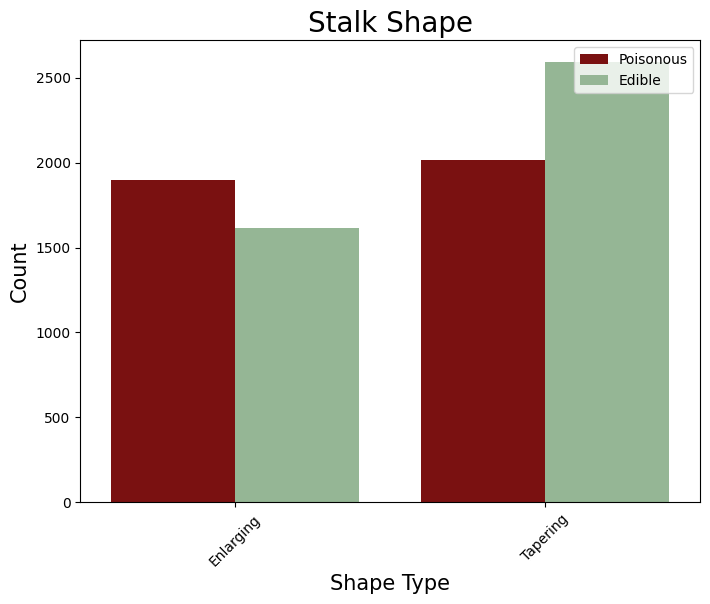

In [84]:
# STALK SHAPE histogram

plt.figure(figsize=(8,6))
sns.countplot(x='stalk_shape', data=dataX, hue='class', palette=colors)
plt.title('Stalk Shape', fontsize=20)
plt.xlabel('Shape Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

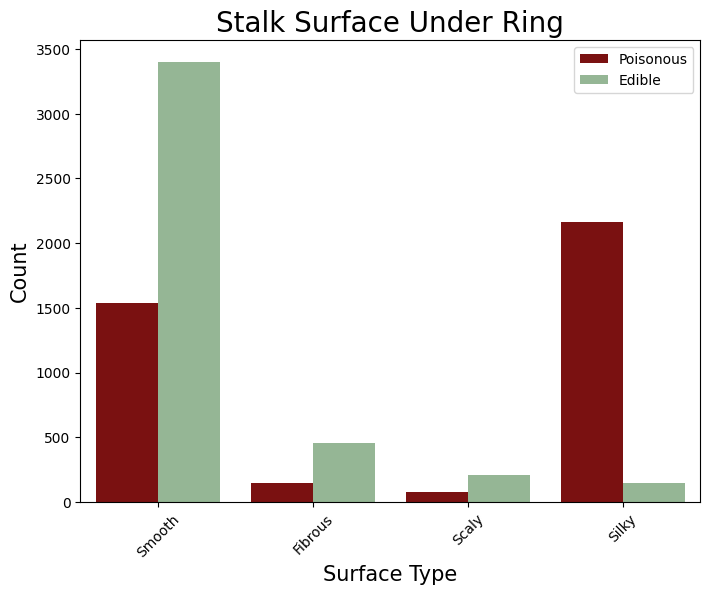

In [85]:
# STALK BELOW histogram

plt.figure(figsize=(8,6))
sns.countplot(x='stalk_surface_below_ring', data=dataX, hue='class', palette=colors)
plt.title('Stalk Surface Under Ring', fontsize=20)
plt.xlabel('Surface Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

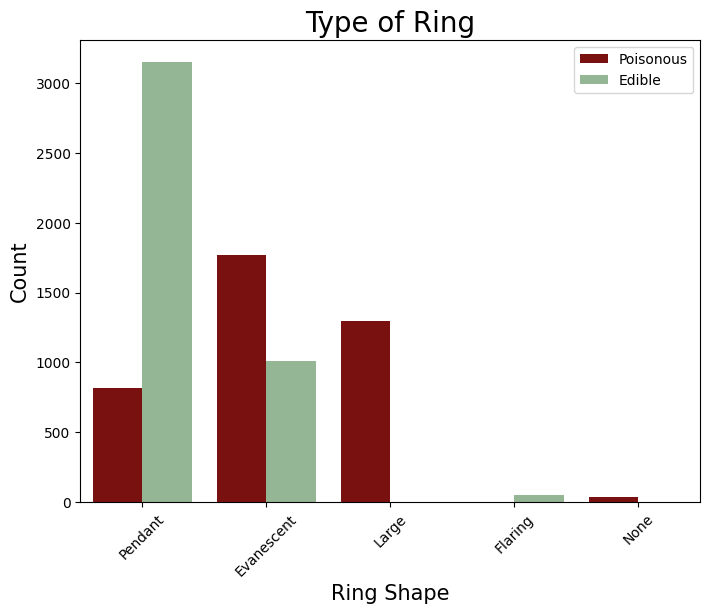

In [86]:
# RING SHAPE histogram

plt.figure(figsize=(8,6))
sns.countplot(x='ring_type', data=dataX, hue='class', palette=colors)
plt.title('Type of Ring', fontsize=20)
plt.xlabel('Ring Shape', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

# Model Prep and Build

In [87]:
data = selected_data

In [88]:
#train-test split
#will be used in all the modles 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [89]:
# PICK a Logistic Regression model based on fferent max_iter values
max_iter_values = [100, 500, 1000, 1500, 2000, 2500]
val_accuracies = []

for max_iter in max_iter_values:
    logistic_regression = LogisticRegression(max_iter=max_iter, random_state=42)
    logistic_regression.fit(X_train, y_train)
    y_pred_val = logistic_regression.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_val)
    val_accuracies.append(accuracy)
    print(f"Validation accuracy for max_iter={max_iter}: {accuracy}")

#best mac inter
best_max_iter = max_iter_values[val_accuracies.index(max(val_accuracies))]
print(f"Best max_iter: {best_max_iter}")

# TRAIN logistic regression model w/ the best mac inter and evaluate
logistdiic_regression_best = LogisticRegression(max_iter=best_max_iter, random_state=42)
logistic_regression_best.fit(X_train, y_train)
y_pred_test = logistic_regression_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy: {test_accuracy}")



Validation accuracy for max_iter=100: 0.8931523022432113
Validation accuracy for max_iter=500: 0.8931523022432113
Validation accuracy for max_iter=1000: 0.8931523022432113
Validation accuracy for max_iter=1500: 0.8931523022432113
Validation accuracy for max_iter=2000: 0.8931523022432113
Validation accuracy for max_iter=2500: 0.8931523022432113
Best max_iter: 100
Test accuracy: 0.8931523022432113


Log Regression done 

Find the best KNN

In [90]:
# PICK KNN models w/ different k values
k_values = list(range(1, 21))  # try k values from 1 to 20
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_val = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    val_accuracies.append(accuracy)
    print(f"Validation accuracy for k={k}: {accuracy}")

#best K
best_k = k_values[val_accuracies.index(max(val_accuracies))]
print(f"Best k value: {best_k}")

# TRAIN a KNN model w/ the best k value and evaluate 
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_test = knn_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy: {test_accuracy}")

Validation accuracy for k=1: 0.8978902953586498
Validation accuracy for k=2: 0.8978902953586498
Validation accuracy for k=3: 0.8978902953586498
Validation accuracy for k=4: 0.8978902953586498
Validation accuracy for k=5: 0.8852320675105485
Validation accuracy for k=6: 0.8852320675105485
Validation accuracy for k=7: 0.8852320675105485
Validation accuracy for k=8: 0.8852320675105485
Validation accuracy for k=9: 0.8852320675105485
Validation accuracy for k=10: 0.8852320675105485
Validation accuracy for k=11: 0.8852320675105485
Validation accuracy for k=12: 0.8852320675105485
Validation accuracy for k=13: 0.8852320675105485
Validation accuracy for k=14: 0.8978902953586498
Validation accuracy for k=15: 0.8978902953586498
Validation accuracy for k=16: 0.8978902953586498
Validation accuracy for k=17: 0.8978902953586498
Validation accuracy for k=18: 0.8978902953586498
Validation accuracy for k=19: 0.8978902953586498
Validation accuracy for k=20: 0.8978902953586498
Best k value: 1
Test accuracy

KNN done

SVM

In [91]:
#PICK SVM models w/ different C values
C_values = [0.001, 0.01, 0.1, 1, 10, 100]  #values from 0.001 to 100
val_accuracies = []

for C in C_values:
    svm = SVC(C=C, random_state=42)
    svm.fit(X_train, y_train)
    y_pred_val = svm.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    val_accuracies.append(accuracy)
    print(f"Validation accuracy for C={C}: {accuracy}")

#best C value
best_C = C_values[val_accuracies.index(max(val_accuracies))]
print(f"Best C value: {best_C}")

# TRAIN SVM model w/ the best C value and evaluate 

svm_best = SVC(C=best_C, random_state=42)
svm_best.fit(X_train, y_train)
y_pred_test = svm_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy: {test_accuracy}")


Validation accuracy for C=0.001: 0.8421940928270042
Validation accuracy for C=0.01: 0.8919831223628693
Validation accuracy for C=0.1: 0.8978902953586498
Validation accuracy for C=1: 0.8978902953586498
Validation accuracy for C=10: 0.8978902953586498
Validation accuracy for C=100: 0.8978902953586498
Best C value: 0.1
Test accuracy: 0.8955135773317592


SVM done

Find the best SVM

In [92]:
from sklearn.metrics import accuracy_score, classification_report

#https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression model
y_pred_logistic = logistic_regression_best.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression accuracy: {accuracy_logistic}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

# k-Nearest Neighbors model
y_pred_knn = knn_best.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nk-Nearest Neighbors accuracy: {accuracy_knn}")
print("Classification Report for k-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))

# Support Vector Machine model
y_pred_svc = svm_best.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"\nSupport Vector Machine accuracy: {accuracy_svc}")
print("Classification Report for Support Vector Machine:")
print(classification_report(y_test, y_pred_svc))


Logistic Regression accuracy: 0.8931523022432113
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1058
           1       0.99      0.72      0.84       636

    accuracy                           0.89      1694
   macro avg       0.92      0.86      0.88      1694
weighted avg       0.91      0.89      0.89      1694


k-Nearest Neighbors accuracy: 0.8955135773317592
Classification Report for k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1058
           1       1.00      0.72      0.84       636

    accuracy                           0.90      1694
   macro avg       0.93      0.86      0.88      1694
weighted avg       0.91      0.90      0.89      1694


Support Vector Machine accuracy: 0.8955135773317592
Classification Report for Support Vector Machine:
              precision    recall  f1-score   supp

Sources: 

missing vales:
*   https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e
*   https://link.springer.com/article/10.1007/s10489-018-1139-9 
*   https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e



http://rstudio-pubs-static.s3.amazonaws.com/293253_357dc3b3d3de44c8896039a9985674d4.html

https://eagronin.github.io/mushroom-classification-prepare/


https://archive.ics.uci.edu/ml/datasets/Mushroom


https://val0.medium.com/100-accurate-mushroom-classification-in-python-eac61da3bace



Setp 1: Clean and understand the data

Attribute Information:

1. **cap-shape:** bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. **cap-surface:** fibrous=f,grooves=g,scaly=y,smooth=s 
3. **cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. **bruises?:** bruises=t,no=f 
5. **odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. **gill-attachment:** attached=a,descending=d,free=f,notched=n 
7. **gill-spacing:** close=c,crowded=w,distant=d 
8. **gill-size:** broad=b,narrow=n 
9. **gill-color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. **stalk-shape:** enlarging=e,tapering=t 
11. **stalk-root:** bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. **stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s 
13. **stalk-surface-below-ring: **fibrous=f,scaly=y,silky=k,smooth=s 
14. **stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. **stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. **veil-type:** partial=p,universal=u 
17. **veil-color:** brown=n,orange=o,white=w,yellow=y 
18. **ring-number:** none=n,one=o,two=t 
19. **ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. **spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. **population:** abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. **habitat:** grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

